Imports related function

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras .preprocessing.sequence import pad_sequences

In [ ]:
import string
import numpy as np
import pandas as pd


Load dataset

In [ ]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \
    -O /tmp/songdata.csv

--2023-11-27 15:40:39--  https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8
Resolving drive.google.com (drive.google.com)... 74.125.199.139, 74.125.199.138, 74.125.199.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.199.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b3ovkjqnh0dhpgp4iru0f7t86ofn32av/1701099600000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8?uuid=669d9094-124b-4bf5-84a0-5715a642e4f6 [following]
--2023-11-27 15:40:58--  https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b3ovkjqnh0dhpgp4iru0f7t86ofn32av/1701099600000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8?uuid=669d9094-124b-4bf5-84a0-5715a642e4f6
Resolving doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-04

In [ ]:
dataset = pd.read_csv('/tmp/songdata.csv', dtype=str)[:250]
dataset.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
def tokenize_corpus(corpus, num_word=-1):
  #fit a tokenizer on the corpus
  if num_word>-1:
    tokenizer= Tokenizer(num_word= num_word)
  else:
    tokenizer= Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

In [ ]:
def create_lyrics_corpus(dataset, field):
  #remove all punctuation
  dataset[field] = dataset[field].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
  #dataset[field]= dataset[field].str.replace("[{}]".format(string.punctuation), "")
  #make it lower case
  dataset[field] = dataset[field].str.lower()
  #make one long string to split by line
  lyrics= dataset[field].str.cat()
  corpus= lyrics.split("\n")
  #remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l]= corpus[l].rstrip()
  #remove any empty lines
  corpus= [l for l in corpus if l != ""]

  return corpus

In [ ]:
corpus= create_lyrics_corpus(dataset, "text")
print(corpus)
tokenizer= tokenize_corpus(corpus)

['look at her face its a wonderful face', 'and it means something special to me', 'look at the way that she smiles when she sees me', 'how lucky can one fellow be', 'shes just my kind of girl she makes me feel fine', 'who could ever believe that she could be mine', 'shes just my kind of girl without her im blue', 'and if she ever leaves me what could i do what could i do', 'and when we go for a walk in the park', 'and she holds me and squeezes my hand', 'well go on walking for hours and talking', 'about all the things that we plan', 'shes just my kind of girl she makes me feel fine', 'who could ever believe that she could be mine', 'shes just my kind of girl without her im blue', 'and if she ever leaves me what could i do what could i do', 'take it easy with me please', 'touch me gently like a summer evening breeze', 'take your time make it slow', 'andante andante', 'just let the feeling grow', 'make your fingers soft and light', 'let your body be the velvet of the night', 'touch my so

In [ ]:
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)

{'the': 1, 'i': 2, 'you': 3, 'a': 4, 'and': 5, 'to': 6, 'me': 7, 'it': 8, 'in': 9, 'my': 10, 'of': 11, 'that': 12, 'your': 13, 'im': 14, 'for': 15, 'all': 16, 'on': 17, 'so': 18, 'love': 19, 'is': 20, 'be': 21, 'we': 22, 'youre': 23, 'when': 24, 'but': 25, 'like': 26, 'just': 27, 'dont': 28, 'its': 29, 'no': 30, 'know': 31, 'with': 32, 'now': 33, 'do': 34, 'la': 35, 'what': 36, 'got': 37, 'can': 38, 'have': 39, 'was': 40, 'take': 41, 'one': 42, 'down': 43, 'if': 44, 'get': 45, 'yeah': 46, 'never': 47, 'time': 48, 'she': 49, 'see': 50, 'up': 51, 'go': 52, 'out': 53, 'baby': 54, 'were': 55, 'more': 56, 'gonna': 57, 'oh': 58, 'this': 59, 'they': 60, 'want': 61, 'night': 62, 'he': 63, 'gotta': 64, 'make': 65, 'at': 66, 'from': 67, 'are': 68, 'let': 69, 'cant': 70, 'way': 71, 'will': 72, 'theres': 73, 'feel': 74, 'well': 75, 'think': 76, 'cause': 77, 'away': 78, 'as': 79, 'could': 80, 'girl': 81, 'aint': 82, 'day': 83, 'how': 84, 'tell': 85, 'her': 86, 'little': 87, 'life': 88, 'said': 89, 

Create Sequences and Label

In [ ]:
sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  #print(token_list)
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
   # print("n gram")
    #print(n_gram_sequence)
    sequences.append(n_gram_sequence)


In [ ]:
print(sequences)
print(len(sequences))

[[111, 66], [111, 66, 86], [111, 66, 86, 206], [111, 66, 86, 206, 29], [111, 66, 86, 206, 29, 4], [111, 66, 86, 206, 29, 4, 1196], [111, 66, 86, 206, 29, 4, 1196, 206], [5, 8], [5, 8, 802], [5, 8, 802, 175], [5, 8, 802, 175, 653], [5, 8, 802, 175, 653, 6], [5, 8, 802, 175, 653, 6, 7], [111, 66], [111, 66, 1], [111, 66, 1, 71], [111, 66, 1, 71, 12], [111, 66, 1, 71, 12, 49], [111, 66, 1, 71, 12, 49, 1760], [111, 66, 1, 71, 12, 49, 1760, 24], [111, 66, 1, 71, 12, 49, 1760, 24, 49], [111, 66, 1, 71, 12, 49, 1760, 24, 49, 1197], [111, 66, 1, 71, 12, 49, 1760, 24, 49, 1197, 7], [84, 1761], [84, 1761, 38], [84, 1761, 38, 42], [84, 1761, 38, 42, 1056], [84, 1761, 38, 42, 1056, 21], [129, 27], [129, 27, 10], [129, 27, 10, 218], [129, 27, 10, 218, 11], [129, 27, 10, 218, 11, 81], [129, 27, 10, 218, 11, 81, 49], [129, 27, 10, 218, 11, 81, 49, 376], [129, 27, 10, 218, 11, 81, 49, 376, 7], [129, 27, 10, 218, 11, 81, 49, 376, 7, 74], [129, 27, 10, 218, 11, 81, 49, 376, 7, 74, 387], [102, 80], [102,

In [ ]:
# Pad sequences for equal input length
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))
# Split sequences between the "input" sequence and "output" predicted word
input_sequences, labels = sequences[:,:-1], sequences[:,-1]
print(input_sequences)
print(labels)
print(len(labels))
# One-hot encode the labels
print(total_words)
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

[[  0   0   0 ...   0   0 111]
 [  0   0   0 ...   0 111  66]
 [  0   0   0 ... 111  66  86]
 ...
 [  0   0   0 ...  15 567 137]
 [  0   0   0 ... 567 137  93]
 [  0   0   0 ...   0   0 952]]
[ 66  86 206 ...  93  20 151]
49793
4148


In [ ]:
# Check out how some of our data is being stored
# The Tokenizer has just a single index per word
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])
# Input sequences will have multiple indexes
print(input_sequences[5])
print(input_sequences[6])
# And the one hot labels will be as long as the full spread of tokenized words
print(one_hot_labels[5])
print(one_hot_labels[6])

31
158
[  0   0   0   0   0   0   0   0   0   0   0   0   0 111  66  86 206  29
   4]
[   0    0    0    0    0    0    0    0    0    0    0    0  111   66
   86  206   29    4 1196]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


Train a Text Generation Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_sequences, one_hot_labels, epochs=100, verbose=1)

Epoch 1/100
1557/1557 [==============================] - 34s 16ms/step - loss: 6.3091 - accuracy: 0.0440
Epoch 2/100
1557/1557 [==============================] - 15s 10ms/step - loss: 5.9402 - accuracy: 0.0504
Epoch 3/100
1557/1557 [==============================] - 15s 10ms/step - loss: 5.7098 - accuracy: 0.0641
Epoch 4/100
1557/1557 [==============================] - 14s 9ms/step - loss: 5.4854 - accuracy: 0.0961
Epoch 5/100
1557/1557 [==============================] - 14s 9ms/step - loss: 5.2907 - accuracy: 0.1119
Epoch 6/100
1557/1557 [==============================] - 15s 10ms/step - loss: 5.1028 - accuracy: 0.1283
Epoch 7/100
1557/1557 [==============================] - 14s 9ms/step - loss: 4.9367 - accuracy: 0.1418
Epoch 8/100
1557/1557 [==============================] - 14s 9ms/step - loss: 4.7908 - accuracy: 0.1569
Epoch 9/100
1557/1557 [==============================] - 14s 9ms/step - loss: 4.6615 - accuracy: 0.1689
Epoch 10/100
1557/1557 [==============================] - 14

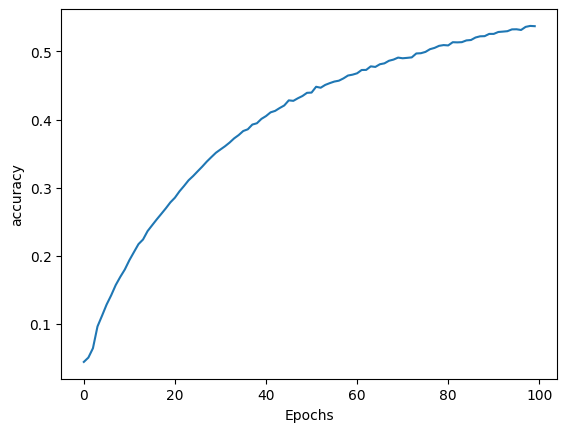

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "im feeling chills"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)
#print(output_word)

1/1 [==============================] - 0s 19ms/step
im feeling chills to the moon for living town the light of the rainbow and i kissed the teacher star star dirty emptiness with you knows it cries for help surprise and guess now is gonna you go ill take that she makes me one day needs a bale a life aint no one in love wanna be anyone see her loss bring yeah yeah yeah yeah yeah were forever easy with a nights are goodbye temperature seek a movie images are her place whenever somebody your kind motherfucker living wellplanned and the sand of melt rise dreadful girlya melt forgot tenderness cord


Varying the Possible Outputs

In [ ]:
# Test the method with just the first word after the seed text
seed_text = "im feeling chills"
next_words = 100

token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
predicted_probs = model.predict(token_list)[0]
predicted = np.random.choice([x for x in range(len(predicted_probs))],
                             p=predicted_probs)
# Running this cell multiple times should get you some variance in output
print(predicted)

1/1 [==============================] - 0s 22ms/step
20


In [ ]:
# Use this process for the full output generation
seed_text = "im feeling chills"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted_probs = model.predict(token_list)[0]
  predicted = np.random.choice([x for x in range(len(predicted_probs))],
                               p=predicted_probs)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 21ms/step
im feeling chills the good things you all only head and with her world have goin times but she angle smiling surprise dam but youre surprise hadnt honesty a beat of tears the tambourine that with a words question rocket gritty wrong seem that against but the bore seem right that i said im a little size long endless clearly proud with you would give me a few morning supernatural answer clearly so done will feel see time too cold and they spend my tears in my connection in albuquerque dyin core thru fights and yeah die scream in down gimme the lights
